In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

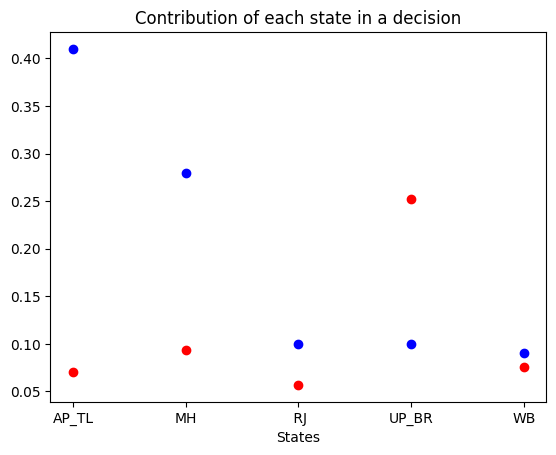

In [47]:
#Answering the question 1
state_info = pd.read_csv('StateInfo.csv')
students = pd.read_csv('JEEDemographics.csv')

labels = ['AP_TL','MH',' RJ', 'UP_BR','WB']

state_order = state_info['State Codes']
state_order = state_order.sort_values()
state_order = state_order.reset_index(drop=True)
column_names = [f'Survey_{i+1}' for i in range(0,50)]

data_alpha = students['Origin'].value_counts()
data_alpha = data_alpha.reset_index(drop=False)
data_alpha = data_alpha.sort_values(by='Origin')
data_alpha.columns = ['Origin', 'Values']

#IITB_students
[AP_TL_IITB, MH_IITB, RJ_IITB, UP_BR_IITB, WB_IITB] = [0.41, 0.28, 0.10, 0.10, 0.09]
#India
[AP_TL, MH, RJ, UP_BR, WB] = [state_info['Population'][0] + state_info['Population'][16], 
                              state_info['Population'][11], state_info['Population'][14],
                              state_info['Population'][17] + state_info['Population'][1],
                              state_info['Population'][19]]

India = [AP_TL, MH, RJ, UP_BR, WB]/state_info['Population'].sum()
IITB = [AP_TL_IITB, MH_IITB, RJ_IITB, UP_BR_IITB, WB_IITB]

plot1 = plt.scatter(labels, India, color='r')
plot1 = plt.scatter(labels, IITB, color='b')
plot1 = plt.xlabel('States')
plot1 = plt.title('Contribution of each state in a decision')

In [48]:
#Method_1
def selection1(k):
    new_array = np.arange(0, k, 1)

    state_origin = students.loc[new_array]
    
    #counts the students in respective states
    classified = state_origin['Origin'].value_counts()
    classified = classified.reindex(state_order, fill_value=0)
    classified = classified.sort_index()
    return classified

def repeat1(k):
    data = pd.DataFrame({'Origin': state_order})
    number = 50
    
    for i in range(0, 50):
        data[column_names[i]] = selection1(k).values
        
    data = data[data.columns.difference(['Origin'])].astype(float)
    data['mean'] = data.mean(axis=1)
    data['std'] = data.std(axis=1)
    data['Origin'] = state_order 
    data['Factor'] = data['std']/data['mean']
    data['Error'] = abs(data['mean']*1500/k - data_alpha['Values'])
    return data

def top_3(data):
    top_3 = pd.DataFrame(np.zeros((3, 2)), columns=['Origin', 'Strength'])

    top_3_indices = data['mean'].nlargest(3).index

    top_3['Origin'] = top_3["Origin"].astype(str)
    top_3['Origin'] = data.loc[top_3_indices, ['Origin']].reset_index(drop=True)

    top_3['Strength'] = top_3['Strength'].astype(float)
    top_3['Strength'] = data.loc[top_3_indices, ['mean']].reset_index(drop=1)

    return top_3

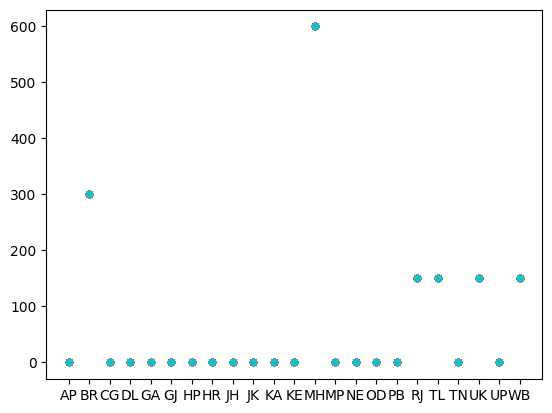

  Origin  Strength
0     MH       4.0
1     BR       2.0
2     RJ       1.0
The percentage of people from top 3 states as per this survey is 70.0


In [49]:
case11 = repeat1(10)
for i in range(0,50):
    plt.scatter(case11['Origin'], case11[column_names[i]]*150, s=20)
plt.show()

top = top_3(case11)
percentage_top = top['Strength'].sum()*100/10
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

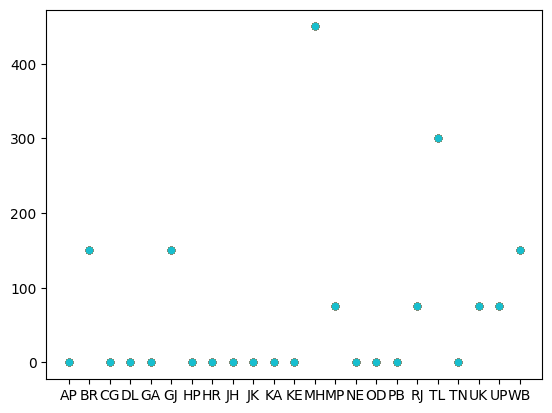

  Origin  Strength
0     MH       6.0
1     TL       4.0
2     BR       2.0
The percentage of people from top 3 states as per this survey is 60.0


In [50]:
case12 = repeat1(20)
for i in range(0,50):
    plt.scatter(case12['Origin'], case12[column_names[i]]*75, s=20)
plt.show()

top = top_3(case12)
percentage_top = top['Strength'].sum()*100/20
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

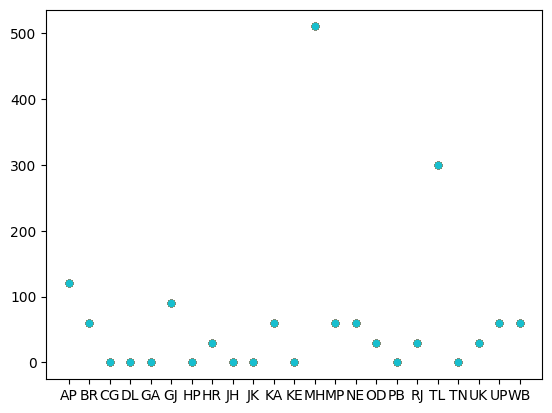

  Origin  Strength
0     MH      17.0
1     TL      10.0
2     AP       4.0
The percentage of people from top 3 states as per this survey is 62.0


In [51]:
case13 = repeat1(50)
for i in range(0,50):
    plt.scatter(case13['Origin'], case13[column_names[i]]*30, s=20)
plt.show()

top = top_3(case13)
percentage_top = top['Strength'].sum()*100/50
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

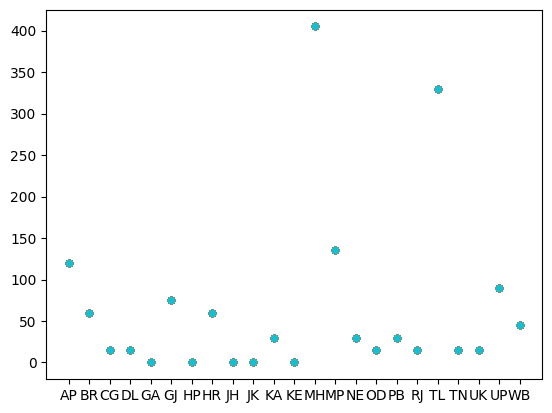

  Origin  Strength
0     MH      27.0
1     TL      22.0
2     MP       9.0
The percentage of people from top 3 states as per this survey is 58.0


In [52]:
case14 = repeat1(100)
for i in range(0,50):
    plt.scatter(case14['Origin'], case14[column_names[i]]*15, s=20)
plt.show()

top = top_3(case14)
percentage_top = top['Strength'].sum()*100/100
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

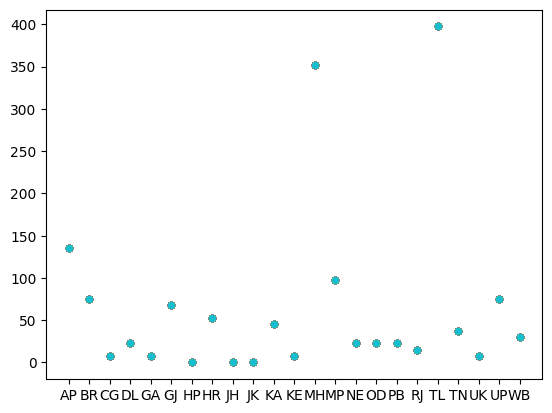

  Origin  Strength
0     TL      53.0
1     MH      47.0
2     AP      18.0
The percentage of people from top 3 states as per this survey is 59.0


In [53]:
case15 = repeat1(200)
for i in range(0,50):
    plt.scatter(case15['Origin'], case15[column_names[i]]*7.5, s=20)
plt.show()

top = top_3(case15)
percentage_top = top['Strength'].sum()*100/200
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

In [54]:
#Method_2
def selection2(k):
    m = random.randint(0,1499)
    new_array = np.arange(m, m+k, 1)
    new_array = [x % 1500 for x in new_array]
    
    state_origin = students.loc[new_array]
    #counts the students in respective states
    classified = state_origin['Origin'].value_counts()
    classified = classified.reindex(state_order, fill_value=0)
    classified = classified.sort_index()
    return classified

def repeat2(k):
    data = pd.DataFrame({'Origin': state_order})
    number = 50
    
    for i in range(0, 50):
        data[column_names[i]] = selection2(k).values
        
    data = data[data.columns.difference(['Origin'])].astype(float)
    data['mean'] = data.mean(axis=1)
    data['std'] = data.std(axis=1)
    data['Origin'] = state_order
    data['Factor'] = data['std']/data['mean']
    data['Error'] = abs(data['mean']*1500/k - data_alpha['Values'])
   
    return data

def top_3(data):
    top_3 = pd.DataFrame(np.zeros((3, 2)), columns=['Origin', 'Strength'])

    top_3_indices = data['mean'].nlargest(3).index

    top_3['Origin'] = top_3["Origin"].astype(str)
    top_3['Origin'] = data.loc[top_3_indices, ['Origin']].reset_index(drop=True)

    top_3['Strength'] = top_3['Strength'].astype(float)
    top_3['Strength'] = data.loc[top_3_indices, ['mean']].reset_index(drop=1)

    return top_3

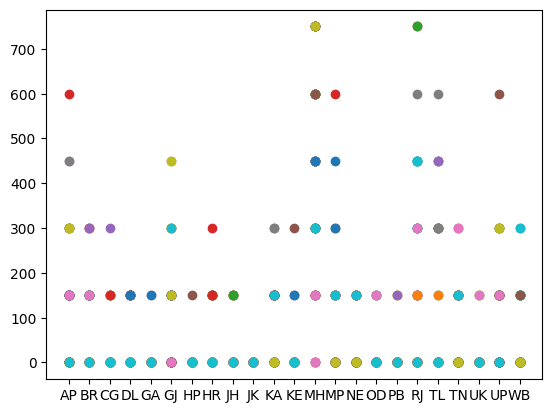

  Origin  Strength
0     MH      2.72
1     AP      0.92
2     RJ      0.82
The percentage of people from top 3 states as per this survey is 44.6


In [55]:
case1 = repeat2(10)
for i in range(0,50):
    plt.scatter(case1['Origin'], case1[column_names[i]]*150)
plt.show()

top = top_3(case1)
percentage_top = top['Strength'].sum()*100/10
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

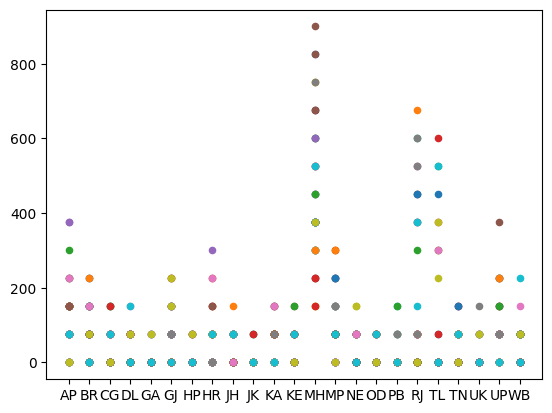

  Origin  Strength
0     MH      5.98
1     RJ      2.14
2     AP      1.52
The percentage of people from top 3 states as per this survey is 48.2


In [56]:
case2 = repeat2(20)
for i in range(0,50):
    plt.scatter(case2['Origin'], case2[column_names[i]]*75, s=20)
plt.show()

top = top_3(case2)
percentage_top = top['Strength'].sum()*100/20
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

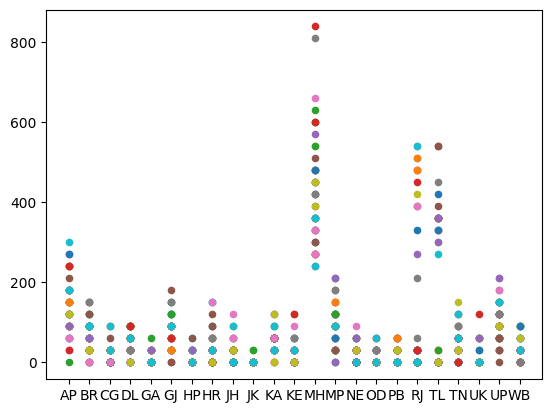

  Origin  Strength
0     MH     14.06
1     RJ      4.94
2     TL      4.76
The percentage of people from top 3 states as per this survey is 47.52


In [57]:
case3 = repeat2(50)
for i in range(0,50):
    plt.scatter(case3['Origin'], case3[column_names[i]]*30, s=20)
plt.show()

top = top_3(case3)
percentage_top = top['Strength'].sum()*100/50
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

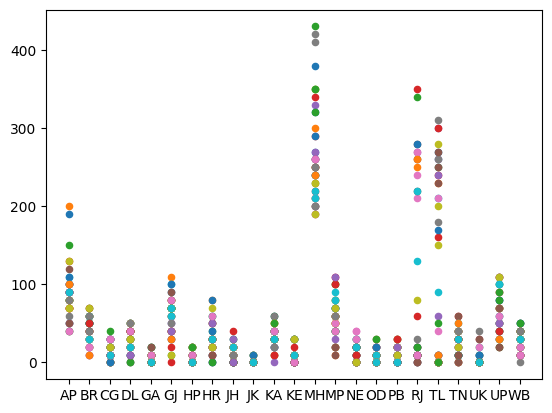

  Origin  Strength
0     MH     26.52
1     TL     11.56
2     AP      8.74
The percentage of people from top 3 states as per this survey is 46.82


In [58]:
case4 = repeat2(100)
for i in range(0,50):
    plt.scatter(case4['Origin'], case4[column_names[i]]*10, s=20)
plt.show()

top = top_3(case4)
percentage_top = top['Strength'].sum()*100/100
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

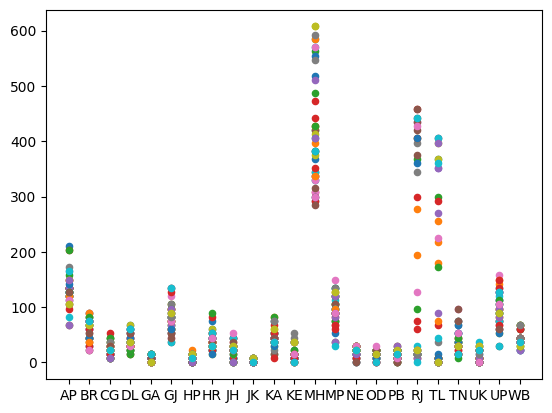

  Origin  Strength
0     MH     55.06
1     RJ     21.72
2     AP     17.38
The percentage of people from top 3 states as per this survey is 47.08


In [59]:
case5 = repeat2(200)
for i in range(0,50):
    plt.scatter(case5['Origin'], case5[column_names[i]]*7.5, s=20)
plt.show()

top = top_3(case5)
percentage_top = top['Strength'].sum()*100/200
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

In [60]:
#Method_3
def selection3(k):
    new_array = np.random.randint(0, 1500, size=k)
    
    state_origin = students.loc[new_array]
    #counts the students in respective states
    classified = state_origin['Origin'].value_counts()
    classified = classified.reindex(state_order, fill_value=0)
    classified = classified.sort_index()
    return classified

def repeat3(k):
    data = pd.DataFrame({'Origin': state_order})
    number = 50
    
    for i in range(0, 50):
        data[column_names[i]] = selection3(k).values
        
    data = data[data.columns.difference(['Origin'])].astype(float)
    data['mean'] = data.mean(axis=1)
    data['std'] = data.std(axis=1)
    data['Origin'] = state_order 
    data['Factor'] = data['std']/data['mean']
    data['Error'] = abs(data['mean']*1500/k - data_alpha['Values'])
    return data

def top_3(data):
    top_3 = pd.DataFrame(np.zeros((3, 2)), columns=['Origin', 'Strength'])

    top_3_indices = data['mean'].nlargest(3).index

    top_3['Origin'] = top_3["Origin"].astype(str)
    top_3['Origin'] = data.loc[top_3_indices, ['Origin']].reset_index(drop=True)

    top_3['Strength'] = top_3['Strength'].astype(float)
    top_3['Strength'] = data.loc[top_3_indices, ['mean']].reset_index(drop=1)

    return top_3

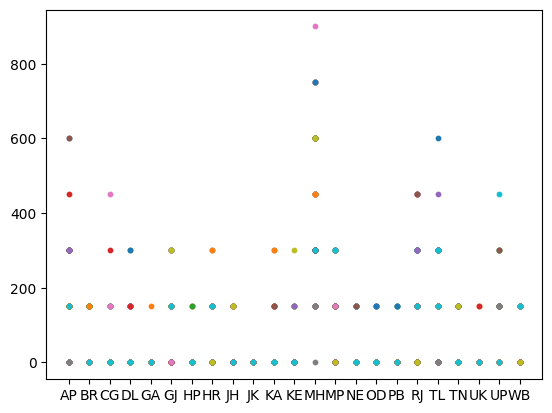

  Origin  Strength
0     MH      2.70
1     AP      1.04
2     RJ      1.04
The percentage of people from top 3 states as per this survey is 47.8


In [61]:
casea = repeat3(10)
for i in range(0,50):
    plt.scatter(casea['Origin'], casea[column_names[i]]*150, s=10)
plt.show()

top = top_3(casea)
percentage_top = top['Strength'].sum()*100/10
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

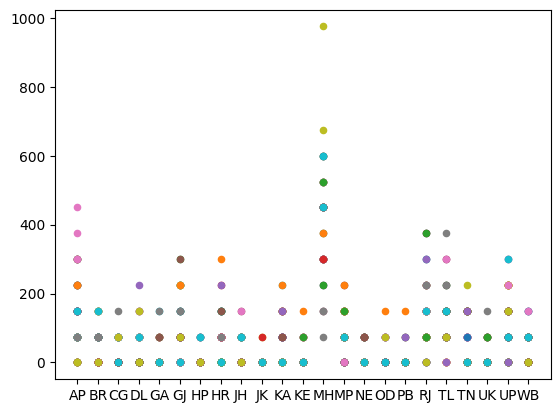

  Origin  Strength
0     MH      5.46
1     AP      1.82
2     RJ      1.78
The percentage of people from top 3 states as per this survey is 45.3


In [62]:
caseb = repeat3(20)
for i in range(0,50):
    plt.scatter(caseb['Origin'], caseb[column_names[i]]*75, s=20)
plt.show()

top = top_3(caseb)
percentage_top = top['Strength'].sum()*100/20
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

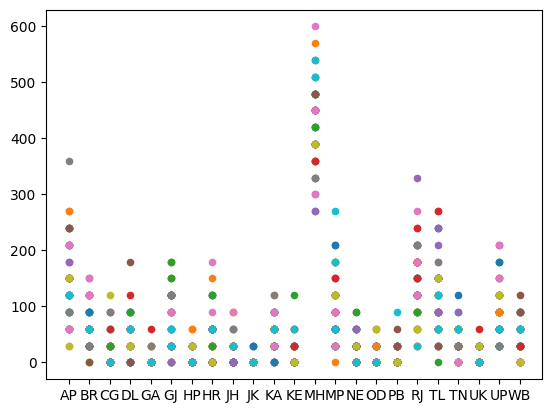

  Origin  Strength
0     MH     14.24
1     AP      4.90
2     RJ      4.74
The percentage of people from top 3 states as per this survey is 47.76000000000001


In [63]:
casec = repeat3(50)
for i in range(0,50):
    plt.scatter(casec['Origin'], casec[column_names[i]]*30, s=20)
plt.show()

top = top_3(casec)
percentage_top = top['Strength'].sum()*100/50
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

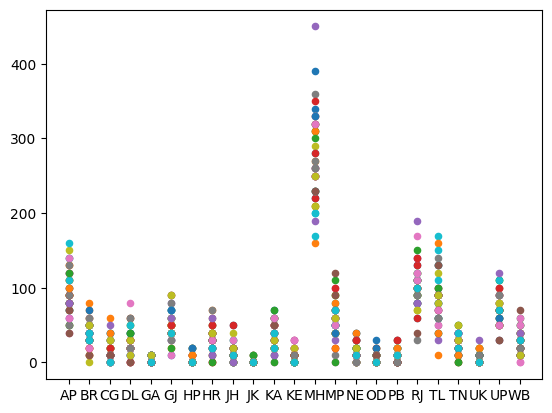

  Origin  Strength
0     MH     27.06
1     RJ     10.22
2     AP      9.20
The percentage of people from top 3 states as per this survey is 46.48


In [64]:
cased = repeat3(100)
for i in range(0,50):
    plt.scatter(cased['Origin'], cased[column_names[i]]*10, s=20)
plt.show()

top = top_3(cased)
percentage_top = top['Strength'].sum()*100/100
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

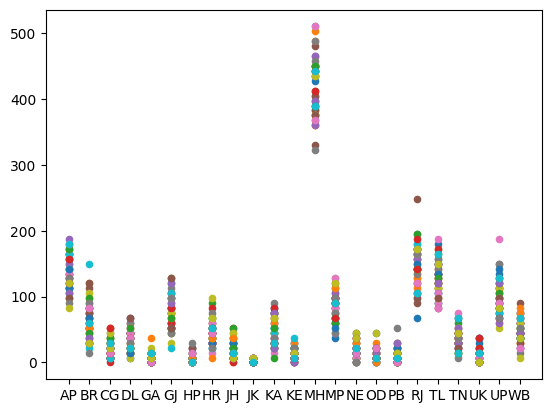

  Origin  Strength
0     MH     56.02
1     RJ     19.70
2     AP     18.26
The percentage of people from top 3 states as per this survey is 46.99


In [65]:
casee = repeat3(200)
for i in range(0,50):
    plt.scatter(casee['Origin'], casee[column_names[i]]*7.5, s=20)
plt.show()

top = top_3(casee)
percentage_top = top['Strength'].sum()*100/200
print(top)
print(f'The percentage of people from top 3 states as per this survey is {percentage_top}')

Origin
MH    420
RJ    149
AP    135
Name: count, dtype: int64

Total number of people from top 3 states are 704
The percentage of people from top 3 states in the overall data is 46.93333333333333


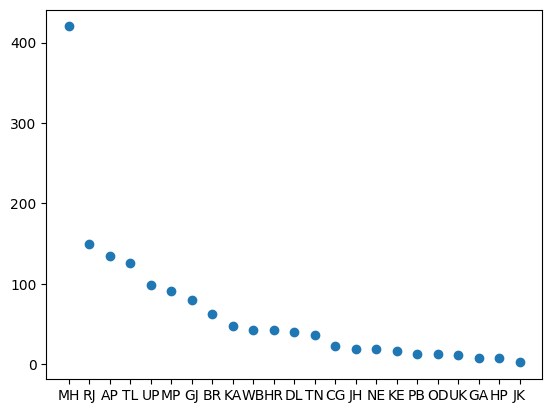

In [66]:
#answer for question (c)
stat = students['Origin'].value_counts()
plt.scatter(stat.index, stat.values)
print(stat.head(3))
print('')

sum_top_3 = stat.head(3).values.sum()
print(f'Total number of people from top 3 states are {sum_top_3}')
percentage_top = sum_top_3/15
print(f'The percentage of people from top 3 states in the overall data is {percentage_top}')

In [67]:
#For the best value of K and Sureness of estimate
#For best method among the three
#Make tables for variance and error for each method
#(2) tables

#table for standard_deviation
table_deviation =  {'K-value' : [10, 20, 50, 100, 200],
                    'Method_1' : [0, 0, 0, 0, 0],
                    'Method_2' : [case1['Factor'].sum(), case2['Factor'].sum(),
                                  case3['Factor'].sum(), case4['Factor'].sum(),
                                  case5['Factor'].sum()],
                    'Method_3' : [casea['Factor'].sum(), caseb['Factor'].sum(),
                                  casec['Factor'].sum(), cased['Factor'].sum(),
                                  casee['Factor'].sum()]}

table_deviation = pd.DataFrame(table_deviation)
print(table_deviation)

#table for error deviation from actual value

table_error =  {    'K-value' : [10, 20, 50, 100, 200],
                    'Method_1' : [case11['Error'].sum(), case12['Error'].sum(), 
                                  case13['Error'].sum(), case14['Error'].sum(),
                                  case15['Error'].sum()],
                    'Method_2' : [case1['Error'].sum(), case2['Error'].sum(),
                                  case3['Error'].sum(), case4['Error'].sum(),
                                  case5['Error'].sum()],
                    'Method_3' : [casea['Error'].sum(), caseb['Error'].sum(),
                                  casec['Error'].sum(), cased['Error'].sum(),
                                  casee['Error'].sum()]}

table_error = pd.DataFrame(table_error)
print(table_error)

table_final = table_deviation**2 + table_error**1.5
table_final['K-value'] = [10, 20, 50, 100, 200]
print(table_final)


   K-value  Method_1   Method_2   Method_3
0       10         0  53.492241  50.350976
1       20         0  38.381565  38.436915
2       50         0  30.282661  26.724870
3      100         0  20.727022  18.334208
4      200         0  14.532338  13.267599
   K-value  Method_1  Method_2  Method_3
0       10    2560.0    1732.0    1720.0
1       20    2318.0    1746.0    1721.0
2       50    2036.0    1759.2    1696.8
3      100    1926.0    1725.8    1751.4
4      200    1832.0    1746.2    1740.8
   K-value       Method_1      Method_2      Method_3
0       10  129526.892960  74942.590544  73868.579086
1       20  111601.529703  74430.042351  72872.973052
2       50   91868.507422  74702.845350  70609.198414
3      100   84524.853008  72124.085778  73631.762392
4      200   78413.024224  73180.622559  72807.245482


In [68]:
#for the standard deviation values for method 2 and K-value of 100
print(cased['std'])

0     2.939388
1     1.685230
2     1.436802
3     1.766352
4     0.480000
5     1.875740
6     0.692820
7     1.615549
8     1.183216
9     0.300000
10    1.786169
11    0.856971
12    5.725068
13    2.552567
14    1.097087
15    0.714423
16    0.886341
17    2.872560
18    3.315479
19    1.278906
20    0.768375
21    2.137756
22    1.594491
Name: std, dtype: float64


In [69]:
demographics = pd.read_csv('JEEDemographics.csv')
demo_states = demographics['Origin']

state_info = pd.read_csv('StateInfo.csv')

v1 = demo_states.value_counts()
Pi = v1/1500

total_pop_india = state_info['Population'].sum()
state_pop = state_info[['State', 'Population','State Codes']]

Qi = state_pop['Population'] / total_pop_india

state_pop = state_pop.set_index('State Codes')
state_pop['prob_of_state_IITB'] = Pi

state_pop = state_pop.reset_index()
state_pop['prob_of_state_India'] = Qi


state_pop['Pi/Qi'] = state_pop['prob_of_state_IITB']/state_pop['prob_of_state_India']
skew_mean = state_pop['Pi/Qi'].sum()/23
state_pop['var'] = (state_pop['Pi/Qi'] - skew_mean)**2
print("skew_var = ",state_pop['var'].sum()/23)

indices = state_pop['var'].nlargest(4).index
print(state_pop.loc[indices]['State Codes'].reset_index(drop=1))
print(state_pop.loc[indices]['var'].reset_index(drop=1))

skew_var =  0.9964948658748203
0    GA
1    MH
2    TL
3    AP
Name: State Codes, dtype: object
0    7.531514
1    3.572091
2    3.165015
3    1.152851
Name: var, dtype: float64


In [70]:
import statsmodels.api as sm

jee_data_path = 'JEEDemographics.csv'
jee_df = pd.read_csv(jee_data_path)

state_population_path = 'StateInfo.csv'
state_population_df = pd.read_csv(state_population_path)

state_column = 'Origin'
jee_df[state_column] = jee_df[state_column].str.strip().str.lower()
state_population_df['State Codes'] = state_population_df['State Codes'].str.strip().str.lower()

student_counts = jee_df[state_column].value_counts()

state_population_df['IITB_Pop_Fraction'] = state_population_df['State Codes'].map(student_counts) / student_counts.sum()

state_population_df['IITB_Pop_Fraction'] = state_population_df['IITB_Pop_Fraction'].fillna(0)

total_per_capita_income = state_population_df['GSDP Per Capita (million Rs.)'].sum()
state_population_df['Fraction_PerCapita'] = state_population_df['GSDP Per Capita (million Rs.)'] / total_per_capita_income

total_population = state_population_df['Population'].sum()
state_population_df['Fraction_Population'] = state_population_df['Population'] / total_population

correlation_matrix = state_population_df[['Fraction_PerCapita', 'Fraction_Population', 'IITB_Pop_Fraction']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

X = state_population_df[['Fraction_PerCapita', 'Fraction_Population']]
y = state_population_df['IITB_Pop_Fraction']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

Correlation Matrix:
                     Fraction_PerCapita  Fraction_Population  \
Fraction_PerCapita             1.000000            -0.443796   
Fraction_Population           -0.443796             1.000000   
IITB_Pop_Fraction             -0.022728             0.485667   

                     IITB_Pop_Fraction  
Fraction_PerCapita           -0.022728  
Fraction_Population           0.485667  
IITB_Pop_Fraction             1.000000  
                            OLS Regression Results                            
Dep. Variable:      IITB_Pop_Fraction   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.931
Date:                Mon, 02 Sep 2024   Prob (F-statistic):             0.0363
Time:                        07:11:01   Log-Likelihood:                 36.679
No. Observations:                  23   AIC:                            -67.36
Df Res

In [71]:
jee_df = pd.read_csv('JEEDemographics.csv')
state_info_df = pd.read_csv('StateInfo.csv')

state_means = jee_df.groupby('Origin').agg({'Rank': 'mean', 'CPI': 'mean', 'First_Salary': 'mean'}).reset_index()

merged_df = pd.merge(state_means, state_info_df, left_on='Origin', right_on='State Codes')

correlation_rank = merged_df['Rank'].corr(merged_df['Literacy %'])
correlation_cpi = merged_df['CPI'].corr(merged_df['Literacy %'])
correlation_salary = merged_df['First_Salary'].corr(merged_df['Literacy %'])

print(f"Correlation between mean Rank and Literacy: {correlation_rank:.2f}")
print(f"Correlation between mean CPI and Literacy: {correlation_cpi:.2f}")
print(f"Correlation between mean First Salary and Literacy: {correlation_salary:.2f}")


Correlation between mean Rank and Literacy: 0.18
Correlation between mean CPI and Literacy: -0.37
Correlation between mean First Salary and Literacy: -0.23


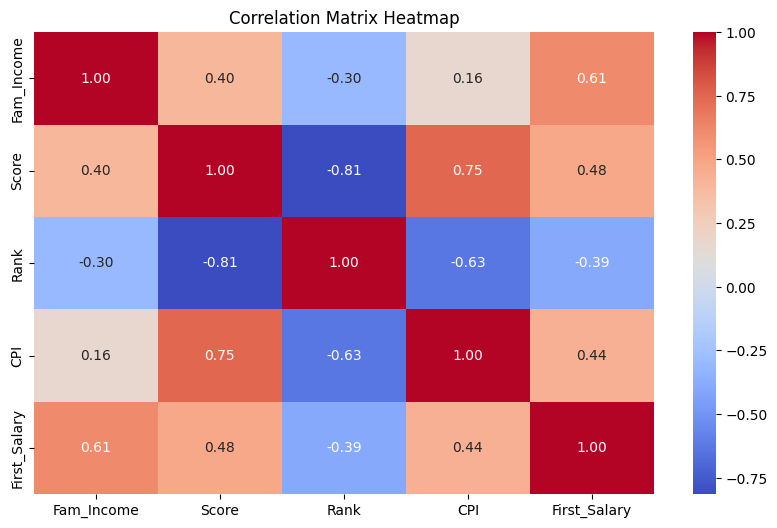

In [72]:
import seaborn as sns
df = pd.read_csv('JEEDemographics.csv')

df_cleaned = df.drop(columns=[df.columns[0], 'Origin'])
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
